In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import graphviz as gv
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
import datetime
import sklearn.metrics as skmetrics
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('./data/car_insurance_cold_calls.csv')

In [3]:
data.shape

(4000, 19)

In [4]:
data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


$$Exploratory Testing$$

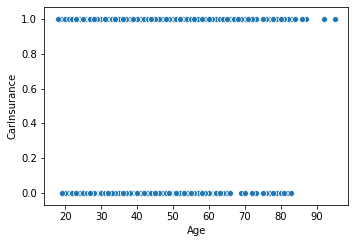

In [5]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.scatterplot(data['Age'], data['CarInsurance'])

#plt.subplot(2,2,2)
#sns.scatterplot(data['Marital'], data['CarInsurance'])


In [6]:
numOfTrue = 0
numOfFalse = 0

for value in data['CarInsurance']:
    if value == True:
        numOfTrue +=1
    else:
        numOfFalse +=1
print(numOfTrue)
print(numOfFalse)

1604
2396


In [7]:
'''Did_They_Buy_Car_Insurance_factor = {}
for c in data.columns[1:-1]:
    #c is key - column names
    #data.groupby(c)['CarInsurance'].sum() is value
    Did_They_Buy_Car_Insurance_factor[c] = data.groupby(c)['CarInsurance'].sum()'''

"Did_They_Buy_Car_Insurance_factor = {}\nfor c in data.columns[1:-1]:\n    #c is key - column names\n    #data.groupby(c)['CarInsurance'].sum() is value\n    Did_They_Buy_Car_Insurance_factor[c] = data.groupby(c)['CarInsurance'].sum()"

In [8]:
'''i = 1
plt.figure(figsize=(14, 35))
for c, p in Did_They_Buy_Car_Insurance_factor.items():
    #10 rows of plots, 2 columns
    plt.subplot(10, 2, i)
    i += 1
    plt.bar(p.index, p.values)
    plt.title('Did They Buy Car Insurance Against {}'.format(c))'''

"i = 1\nplt.figure(figsize=(14, 35))\nfor c, p in Did_They_Buy_Car_Insurance_factor.items():\n    #10 rows of plots, 2 columns\n    plt.subplot(10, 2, i)\n    i += 1\n    plt.bar(p.index, p.values)\n    plt.title('Did They Buy Car Insurance Against {}'.format(c))"

In [9]:
#plt.figure(figsize=(12, 8))
#plt.bar(data['Job'], data.groupby('Job')['CarInsurance'].sum())

In [10]:
'''#Amazing!!!!!
sns.countplot('HHInsurance', hue='CarInsurance', data=data)'''

"#Amazing!!!!!\nsns.countplot('HHInsurance', hue='CarInsurance', data=data)"

In [11]:
'''plt.figure(figsize=(18,8))
sns.countplot('Age', hue='CarInsurance', data=data)'''

"plt.figure(figsize=(18,8))\nsns.countplot('Age', hue='CarInsurance', data=data)"

In [12]:
'''plt.figure(figsize=(14,8))
sns.countplot('Job', hue='CarInsurance', data=data)'''

"plt.figure(figsize=(14,8))\nsns.countplot('Job', hue='CarInsurance', data=data)"

In [13]:
'''plt.figure(figsize=(14,8))
sns.countplot('Marital', hue='CarInsurance', data=data)'''

"plt.figure(figsize=(14,8))\nsns.countplot('Marital', hue='CarInsurance', data=data)"

In [14]:
'''plt.figure(figsize=(14,8))
sns.countplot('Education', hue='CarInsurance', data=data)'''

"plt.figure(figsize=(14,8))\nsns.countplot('Education', hue='CarInsurance', data=data)"

In [15]:
'''plt.figure(figsize=(14,8))
sns.countplot('Default', hue='CarInsurance', data=data)'''

"plt.figure(figsize=(14,8))\nsns.countplot('Default', hue='CarInsurance', data=data)"

In [16]:
'''plt.figure(figsize=(14,8))
sns.countplot('Balance', hue='CarInsurance', data=data)'''

"plt.figure(figsize=(14,8))\nsns.countplot('Balance', hue='CarInsurance', data=data)"

In [17]:
'''plt.figure(figsize=(14,8))
sns.countplot('HHInsurance', hue='CarInsurance', data=data)'''

"plt.figure(figsize=(14,8))\nsns.countplot('HHInsurance', hue='CarInsurance', data=data)"

In [18]:
'''plt.figure(figsize=(14,8))
sns.countplot('CarLoan', hue='CarInsurance', data=data)'''

"plt.figure(figsize=(14,8))\nsns.countplot('CarLoan', hue='CarInsurance', data=data)"

In [19]:
'''plt.figure(figsize=(14,8))
sns.countplot('Communication', hue='CarInsurance', data=data)'''

"plt.figure(figsize=(14,8))\nsns.countplot('Communication', hue='CarInsurance', data=data)"

In [20]:
'''plt.figure(figsize=(14,8))
sns.countplot('NoOfContacts', hue='CarInsurance', data=data)'''

"plt.figure(figsize=(14,8))\nsns.countplot('NoOfContacts', hue='CarInsurance', data=data)"

In [21]:
'''plt.figure(figsize=(14,8))
sns.countplot('DaysPassed', hue='CarInsurance', data=data)'''

"plt.figure(figsize=(14,8))\nsns.countplot('DaysPassed', hue='CarInsurance', data=data)"

In [22]:
'''plt.figure(figsize=(14,8))
sns.countplot('PrevAttempts', hue='CarInsurance', data=data)'''

"plt.figure(figsize=(14,8))\nsns.countplot('PrevAttempts', hue='CarInsurance', data=data)"

In [23]:
'''plt.figure(figsize=(14,8))
sns.countplot('Outcome', hue='CarInsurance', data=data)'''

"plt.figure(figsize=(14,8))\nsns.countplot('Outcome', hue='CarInsurance', data=data)"

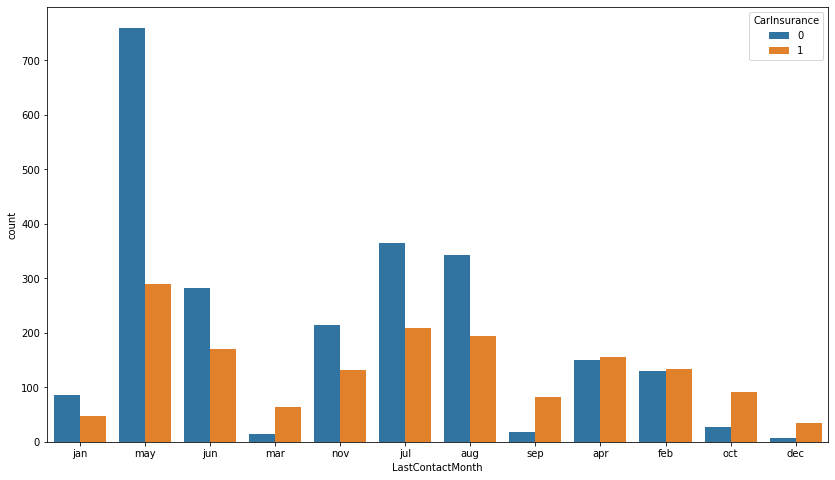

In [24]:
plt.figure(figsize=(14,8))
sns.countplot('LastContactMonth', hue='CarInsurance', data=data)

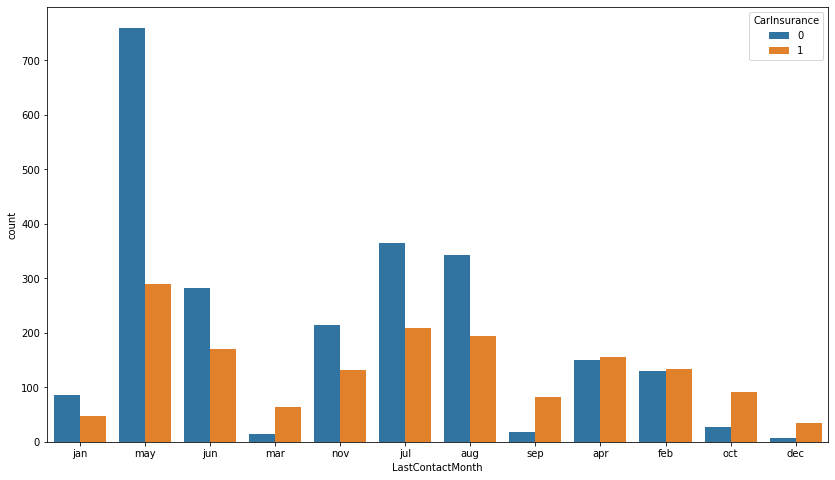

In [25]:
plt.figure(figsize=(14,8))
sns.countplot('LastContactMonth', hue='CarInsurance', data=data)

In [26]:
#Encode the data
dataEncoded = pd.get_dummies(data,columns = ['Job'], drop_first=True)
##Encode Job, Marital, Education, Communication,
#combine last contact day + last contact month , outcome
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Marital'], drop_first=True)

dataEncoded = pd.get_dummies(dataEncoded,columns = ['Education'], drop_first=True)

dataEncoded = pd.get_dummies(dataEncoded,columns = ['Communication'], drop_first=True)

dataEncoded = pd.get_dummies(dataEncoded,columns = ['Outcome'], drop_first=True)


In [27]:
dataEncoded.shape

(4000, 31)

In [28]:
dataEncoded.columns

Index(['Id', 'Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan',
       'LastContactDay', 'LastContactMonth', 'NoOfContacts', 'DaysPassed',
       'PrevAttempts', 'CallStart', 'CallEnd', 'CarInsurance',
       'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Marital_married',
       'Marital_single', 'Education_secondary', 'Education_tertiary',
       'Communication_telephone', 'Outcome_other', 'Outcome_success'],
      dtype='object')

In [29]:
#dataEncoded['CallEnd']=pd.Timedelta(dataEncoded['CallEnd'])
dataEncoded['CallEnd']=pd.to_datetime(dataEncoded['CallEnd'])
dataEncoded['CallStart']=pd.to_datetime(dataEncoded['CallStart'])
dataEncoded['CallDuration'] = dataEncoded['CallEnd'] - dataEncoded['CallStart']

In [30]:
dataEncoded['CallDuration'].describe()
data['CallDuration']=dataEncoded['CallDuration']

In [31]:
valuesToAddToDF = []
for calldurationstamp in dataEncoded['CallDuration']:
    
    formattedCallDurationStamp = (str(calldurationstamp).split(' ')[2])
    ftr = [3600,60,1]
    valueToAdd = sum([a*b for a,b in zip(ftr, map(int,formattedCallDurationStamp.split(':')))])
    valuesToAddToDF.append(valueToAdd)


dataEncoded['CallDurationSeconds'] = valuesToAddToDF

In [32]:
dataEncoded.head()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,...,Job_unemployed,Marital_married,Marital_single,Education_secondary,Education_tertiary,Communication_telephone,Outcome_other,Outcome_success,CallDuration,CallDurationSeconds
0,1,32,0,1218,1,0,28,jan,2,-1,...,0,0,1,0,1,1,0,0,00:01:10,70
1,2,32,0,1156,1,0,26,may,5,-1,...,0,1,0,0,0,0,0,0,00:03:05,185
2,3,29,0,637,1,0,3,jun,1,119,...,0,0,1,0,1,0,0,0,00:05:40,340
3,4,25,0,373,1,0,11,may,2,-1,...,0,0,1,0,0,0,0,0,00:13:39,819
4,5,30,0,2694,0,0,3,jun,1,-1,...,0,1,0,0,1,0,0,0,00:03:12,192


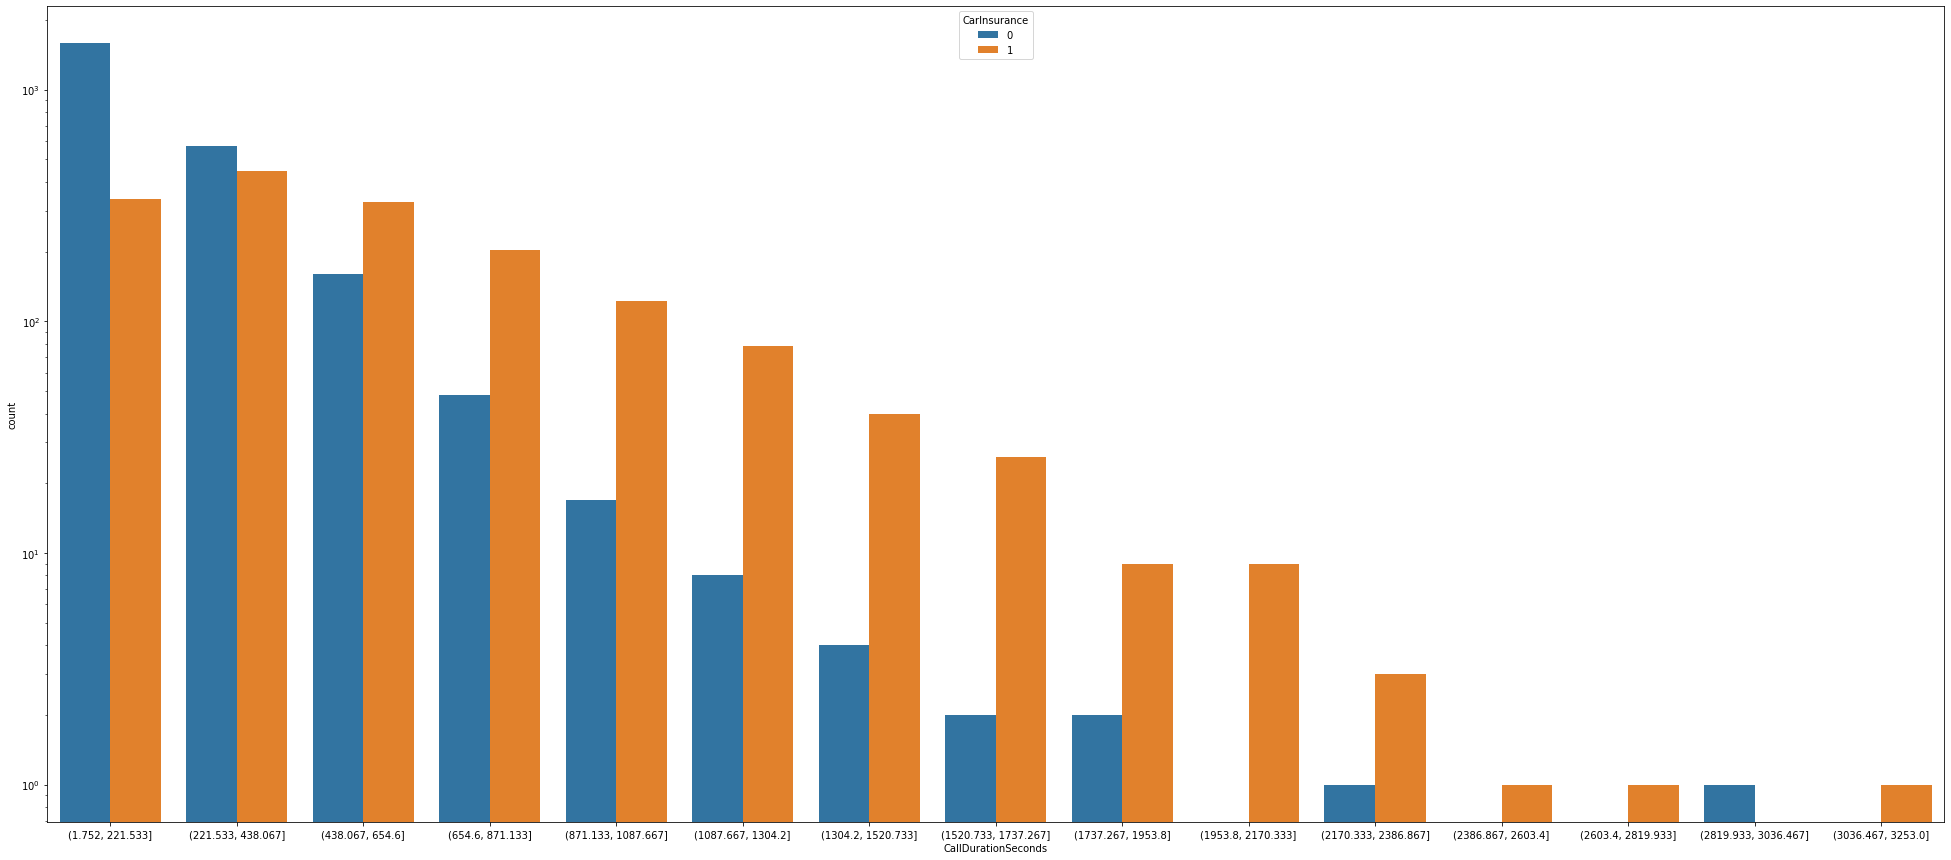

In [33]:
dataEncoded.sort_values("CallDurationSeconds", axis = 0, ascending = True, 
                 inplace = True, na_position ='last')

valuesToAddToDF.sort()

callDurationBins=pd.cut(dataEncoded['CallDurationSeconds'],15)
#print(callDurationBins)
plt.figure(figsize=(34,15))
sns.countplot(callDurationBins, hue='CarInsurance', data=dataEncoded)
plt.yscale('log')

#sns.countplot(call
#plt.figure(figsize=(34,15))
#plt.hist(dataEncoded["CallDuration"], bins=10)
#plt.scatter(dataEncoded["CallDuration"], dataEncoded["CarInsurance"])

#DurationBins, hue='CarInsurance', data=data)

In [34]:
print(callDurationBins)

2821        (1.752, 221.533]
254         (1.752, 221.533]
329         (1.752, 221.533]
3037        (1.752, 221.533]
2628        (1.752, 221.533]
                ...         
1317    (2170.333, 2386.867]
3112      (2386.867, 2603.4]
1341      (2603.4, 2819.933]
2051    (2819.933, 3036.467]
1310      (3036.467, 3253.0]
Name: CallDurationSeconds, Length: 4000, dtype: category
Categories (15, interval[float64]): [(1.752, 221.533] < (221.533, 438.067] < (438.067, 654.6] < (654.6, 871.133] ... (2386.867, 2603.4] < (2603.4, 2819.933] < (2819.933, 3036.467] < (3036.467, 3253.0]]


In [35]:
dataEncoded.head()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,...,Job_unemployed,Marital_married,Marital_single,Education_secondary,Education_tertiary,Communication_telephone,Outcome_other,Outcome_success,CallDuration,CallDurationSeconds
2821,2822,21,0,519,0,0,4,oct,1,-1,...,0,0,1,1,0,0,0,0,00:00:05,5
254,255,58,0,0,1,0,31,jul,25,-1,...,0,1,0,0,0,0,0,0,00:00:05,5
329,330,29,0,-105,1,0,27,may,3,-1,...,0,0,1,1,0,0,0,0,00:00:05,5
3037,3038,48,0,10655,0,0,31,jul,3,-1,...,0,1,0,1,0,1,0,0,00:00:05,5
2628,2629,36,0,2347,1,0,21,nov,3,-1,...,1,1,0,0,0,0,0,0,00:00:05,5


In [36]:
dataEncoded.columns

Index(['Id', 'Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan',
       'LastContactDay', 'LastContactMonth', 'NoOfContacts', 'DaysPassed',
       'PrevAttempts', 'CallStart', 'CallEnd', 'CarInsurance',
       'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Marital_married',
       'Marital_single', 'Education_secondary', 'Education_tertiary',
       'Communication_telephone', 'Outcome_other', 'Outcome_success',
       'CallDuration', 'CallDurationSeconds'],
      dtype='object')

In [58]:
#drop id
#drop callStart and CallEnd
#dataEncoded['CallEnd']=pd.Timedelta(dataEncoded['CallEnd'])
#drop last contact day and month
x=dataEncoded[['Age', 'Balance', 'HHInsurance', 'CarLoan',
        'NoOfContacts', 'DaysPassed',
       'PrevAttempts', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed',
       'Communication_telephone', 'Outcome_other', 'Outcome_success', 'CallDurationSeconds']]
y=dataEncoded['CarInsurance']
#drop last contact day and month

#x=dataEncoded['CallDurationSeconds']
#y=dataEncoded['CarInsurance']

#data.groupby(c)['CarInsurance'].sum()
#dataEncoded['CarInsurance']
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25 ,random_state = 20 )

In [59]:
#x.loc[x['Age'] == 20]

In [60]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
dtr5 = DecisionTreeClassifier(max_depth=5)
dtr10=DecisionTreeClassifier(max_depth=10)
rfr = RandomForestClassifier(max_depth=12, random_state=0)
gb = GradientBoostingClassifier(max_depth=5)


In [70]:
parameters = {'max_depth':np.asarray([6,12]), 'random_state':np.asarray([0,1])}
gs = GridSearchCV(rfr, parameters)
gs.fit(x_train, y_train)
y_predicted = regressor.predict(x_test)
print("CONFUSION MATRIX for " + str(regressor) + " ==== \n" + str(skmetrics.confusion_matrix(y_test, y_predicted)))
print('Our model has correctly classified {0}% of all observations in the test data' \
                .format(skmetrics.accuracy_score(y_test, y_predicted) * 100))
#gs = GridSearchCV()


c:\users\aakash.patel\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CONFUSION MATRIX for GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) ==== 
[[309  59]
 [ 78 220]]
Our model has correctly classified 79.42942942942943% of all observations in the test data


In [61]:
regressor_dictionary = {'Logistic Regression':lr,
                       'Decision Tree depth 5': dtr5,
                       'Decision Tree depth 10': dtr10,
                       'Random Forest': rfr,
                       "Gradient Boosting": gb}
kf = KFold(n_splits = 6, shuffle=True)


for regressor in regressor_dictionary.values():
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    for train_idx, test_idx in kf.split(x, y):
        x_train, y_train, x_test, y_test = x.iloc[train_idx], y.iloc[train_idx], \
        x.iloc[test_idx], y.iloc[test_idx]
    
        regressor.fit(x_train, y_train)
        y_predicted = regressor.predict(x_test)
        #print(y_test.value_counts())
        print("===============================================================")
        print("CONFUSION MATRIX for " + str(regressor) + " ==== \n" + str(skmetrics.confusion_matrix(y_test, y_predicted)))
        print('Our model has correctly classified {0}% of all observations in the test data' \
                .format(skmetrics.accuracy_score(y_test, y_predicted) * 100))
        print("===============================================================")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CONFUSION MATRIX for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) ==== 
[[354  45]
 [ 81 187]]
Our model has correctly classified 81.10944527736132% of all observations in the test data
CONFUSION MATRIX for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) ==== 
[[330  48]
 [ 85 204]]
Our model has correctly classified 80.0599700149925% of all observations in

c:\users\aakash.patel\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CONFUSION MATRIX for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False) ==== 
[[331  73]
 [ 63 200]]
Our model has correctly classified 79.61019490254873% of all observations in the test data
CONFUSION MATRIX for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_esti

In [41]:
# #instead of train test split use cross validation
# kf = KFold(n_splits = 6, shuffle=True)

# lr = LogisticRegression(solver='lbfgs', max_iter=10000)

# plt.figure(figsize=(14, kf.get_n_splits() * 6))

# for train_idx, test_idx in kf.split(x, y):
#     #train_idx, test_idx = d[0], d[1]
#     #print(train_idx.size)
#     x_train, y_train, x_test, y_test = x.iloc[train_idx], y.iloc[train_idx], \
#         x.iloc[test_idx], y.iloc[test_idx]

#     lr.fit(x_train, y_train)
#     y_predicted = lr.predict(x_test)
#     #print(y_test.value_counts())
#     print("CONFUSION MATRIX ==== \n" + str(skmetrics.confusion_matrix(y_test, y_predicted)))
#     print('Our model has correctly classified {0}% of all observations in the test data' \
#       .format(skmetrics.accuracy_score(y_test, y_predicted) * 100))
    


CONFUSION MATRIX ==== 
[[355  46]
 [ 77 189]]
Our model has correctly classified 81.55922038980509% of all observations in the test data
CONFUSION MATRIX ==== 
[[353  46]
 [ 79 189]]
Our model has correctly classified 81.25937031484258% of all observations in the test data
CONFUSION MATRIX ==== 
[[346  45]
 [ 85 191]]
Our model has correctly classified 80.50974512743629% of all observations in the test data
CONFUSION MATRIX ==== 
[[371  47]
 [ 84 165]]
Our model has correctly classified 80.35982008995502% of all observations in the test data
CONFUSION MATRIX ==== 
[[349  44]
 [ 77 196]]
Our model has correctly classified 81.83183183183183% of all observations in the test data
CONFUSION MATRIX ==== 
[[334  60]
 [ 84 188]]
Our model has correctly classified 78.37837837837837% of all observations in the test data


<Figure size 1008x2592 with 0 Axes>

In [42]:
# #instead of train test split use cross validation
# kf = KFold(n_splits = 6, shuffle=True)

# lr = LogisticRegression(solver='lbfgs', max_iter=10000)

# plt.figure(figsize=(14, kf.get_n_splits() * 6))

# for i, d in enumerate(kf.split(x, y)):
#     train_idx, test_idx = d[0], d[1]
#     #print(train_idx.size)
#     x_train, y_train, x_test, y_test = x[train_idx], y[train_idx], x[test_idx], y[test_idx]
    
#     # Show scatter plot of train data
#     ax = plt.subplot(kf.get_n_splits(), 2, i * 2 + 1)
#     plt.plot(x_train, y_train, '.')
#     plt.xlabel('Call Duration(Seconds)')
#     plt.ylabel('Did They Buy Car Insurance')
#     #plt.ylim(y.min(), 4)
#     plt.title('Train Data')
#     lr.fit(x_train.values.reshape(-1,1), y_train)
#     #t = '\n'.join(['Iteration {}'.format(i + 1),
#                  # 'gpa = {:.3f} + {:.3f}sat'.format(lr.intercept_[0], lr.coef_[0][0])])
#     #plt.text(0.05, 0.95, t, transform=ax.transAxes, fontsize=12, verticalalignment='top')
    
#     y_predicted = lr.predict(x_test.values.reshape(-1,1))
#     y_test.value_counts()
#     skmetrics.confusion_matrix(y_test, y_predicted)
    
#     # Calculate Residual Sum of Squares (RSS) and Total Sum of Squares (TSS)
#     #rss = ((y_test - y_predicted)**2).sum()
#     #tss = ((y_test - y_test.mean())**2).sum()
    
#     # Show scatter plot of predicted data
#     ax = plt.subplot(kf.get_n_splits(), 2, i * 2 + 2)
#     plt.plot(x_test, y_test, '.', label='observed')
#     plt.plot(x_test, y_predicted, c='r', label='predicted')
#     plt.xlabel('Call Duration(Seconds)')
#     plt.ylabel('Did They Buy Car Insurance')
#     plt.ylim(y.min(), 4)
#     plt.title('Test Data')
#     plt.legend(loc='upper right')
#    # t = 'rss={:.3f}, tss={:.3f}, r2={:.3f}'.format(rss, tss, 1.0 - rss/tss)
#     #plt.text(0.05, 0.95, t, transform=ax.transAxes, fontsize=12, verticalalignment='top')
    
#     #r2.append(1.0 - rss / tss)

# #print('Mean R-squared: {:.3f}'.format(np.mean(r2)))

In [43]:
##as the dependent variable is a boolean will need to use a classification algorithm
#consider
#Logistic regression
#Decision Tree
#Random Forest
#Gradient Boosting
#k-means Clustering
#hierarhcical clustering


In [44]:
# lr = LogisticRegression(solver='lbfgs', max_iter=10000)
# lr.fit(x_train, y_train)

In [45]:
import sklearn.metrics as skmetrics
y_test_predicted = lr.predict(x_test)
y_test.value_counts() #tells you how many people did and did not buy car insurance

0    394
1    272
Name: CarInsurance, dtype: int64

In [46]:
skmetrics.confusion_matrix(y_test, y_test_predicted)

array([[334,  60],
       [ 84, 188]], dtype=int64)

In [47]:
######DECISION TREE

In [48]:
tree = DecisionTreeClassifier(max_depth=4)

In [49]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

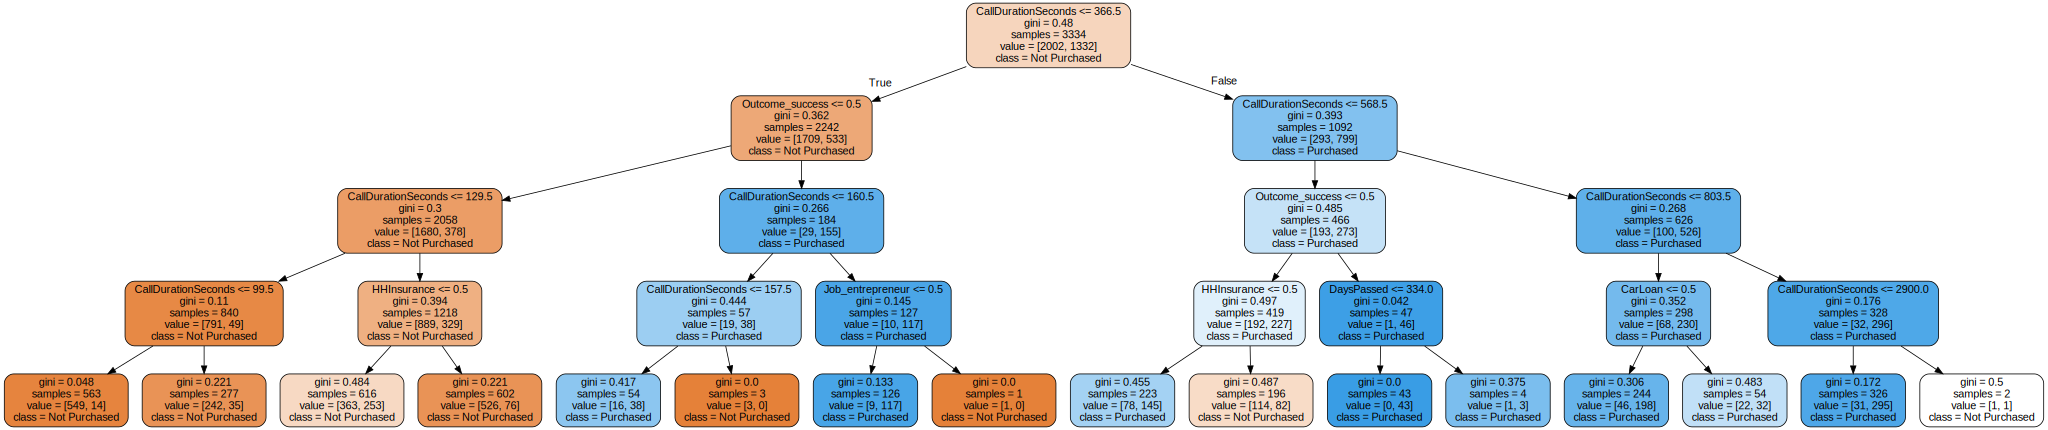

In [50]:
gv.Source(export_graphviz(tree, feature_names=x.columns, filled=True, rounded=True,
                         class_names=['Not Purchased', 'Purchased']))

In [51]:
y_predict = tree.predict(x_test)

In [52]:
print('# of individuals who made a purchase: {0}\n' \
     '# of individuals who did not make a purchase: {1}' \
     .format(y_test.value_counts()[1], y_test.value_counts()[0]))

# of individuals who made a purchase: 272
# of individuals who did not make a purchase: 394


In [53]:
metrics.confusion_matrix(y_test, y_predict)

NameError: name 'metrics' is not defined

In [ ]:
#x = dataEncoded[dataEncoded.columns[-2,-1]]
#x = dataEncoded[dataEncoded.columns[-2,-1]]

In [ ]:
##k-Means Clustering
wcss = []
for i in range(1, 20):
    kmeans = KMeans(i)
    kmeans.fit(x) # contain all dependent variables
    wcss.append(kmeans.inertia_)


In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 20), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#pick 5 clusters

In [ ]:
kmeans = KMeans(n_clusters=5)

In [ ]:
y_kmeans = kmeans.fit_predict(x)

In [ ]:
dataEncoded['cluster'] = y_kmeans

In [ ]:
dataEncoded.head()